Notebook for pairing probablity for H chondrites

In [20]:
import itertools

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from models.meteorite import Meteorite
from scripts.pairing import calculate_pairing_probability

plt.style.use('ggplot')


In [21]:
#import data
data_H = pd.read_csv('pepita_H5-6.csv', delimiter=';')


#Replace commas with points 

for col in data_H.columns:
    data_H[col] = data_H[col].apply(lambda x: str(x).replace(",", "."))
    try:
        data_H[col] = data_H[col].astype(float)
    except ValueError:
        pass

#Pairing for meteorites > 20 g
pairing_data_H = data_H
display(pairing_data_H)
display(pairing_data_H.dtypes)




,Work name,Official name,TKW (g),n,DCA,Year,Magnetic Susceptibility,Group,Petrographic Type,Weathering Grade,Fayalite Content,Ferrosilite Content,Wo,Longitude,Latitude,Unnamed: 15
0,RM008,Catalina 696,808.00,1.0,Catalina South,2010.0,5.25,H,5.5,1.0,NaN,NaN,NaN,-69.928150,-25.069520,NaN
1,RM018,Catalina 682,706.00,1.0,Catalina South,2010.0,5.18,H,5.5,1.0,NaN,NaN,NaN,-69.930470,-25.070050,NaN
2,RM098,Catalina 677,173.60,1.0,Catalina South,2010.0,5.02,H,5.5,2.0,NaN,NaN,NaN,-69.933620,-25.071880,NaN
3,GC216,Catalina 836,124.43,4.0,Catalina South,2023.0,5.09,H,5.5,1.0,NaN,NaN,NaN,-69.919661,-25.071093,NaN
4,GB192,Catalina 427,114.50,1.0,Catalina South,2022.0,5.08,H,5.5,1.0,NaN,NaN,NaN,-69.937160,-25.073610,NaN
5,MB101,Catalina 662,75.30,2.0,Catalina South,2022.0,5.11,H,5.5,1.0,NaN,NaN,NaN,-69.917450,-25.075950,NaN
6,GA202,Catalina 516,56.90,2.0,Catalina South,2019.0,5.10,H,5.5,1.0,NaN,NaN,NaN,-69.912030,-25.097860,NaN
7,MA314,Catalina 564,50.70,1.0,Catalina South,2019.0,4.69,H,5.5,3.0,19.1,16.7,1.5,-69.915800,-25.081900,NaN
8,GC161,Catalina 834,43.11,1.0,Catalina South,2023.0,5.04,H,5.5,2.0,NaN,NaN,NaN,-69.928953,-25.073967,NaN
9,Dm133,Catalina 566,42.60,10.0,Catalina South,2017.0,4.74,H,5.5,2.0,18.3,18.7,1.1,-69.910400,-25.093010,NaN


Work name                   object
Official name               object
TKW (g)                    float64
n                          float64
DCA                         object
Year                       float64
Magnetic Susceptibility    float64
Group                       object
Petrographic Type          float64
Weathering Grade           float64
Fayalite Content           float64
Ferrosilite Content        float64
Wo                         float64
Longitude                  float64
Latitude                   float64
Unnamed: 15                float64
dtype: object

In [22]:
#pairing_data_H = pairing_data_H[(pairing_data_H["Petrographic Type"] == 3) | (pairing_data_H["Petrographic Type"] == 5.5)]

In [23]:
meteorites_Hist_H = []

for index, row in pairing_data_H.iterrows():
    meteorites_Hist_H.append(
        Meteorite(
            name=row["Work name"], position=tuple([row["Latitude"], row["Longitude"]]),
            petrographic_type=row["Petrographic Type"],
            weathering_grade=row["Weathering Grade"], fa_content=row["Fayalite Content"],
            fs_content=row["Ferrosilite Content"], mag_sus=row["Magnetic Susceptibility"]
        )
    )


In [24]:
display(meteorites_Hist_H)


[RM008,
 RM018,
 RM098,
 GC216,
 GB192,
 MB101,
 GA202,
 MA314,
 GC161,
 Dm133,
 MC056,
 MB336,
 MC183,
 GA215]

## <u>Calculation :</u>
- Generating aL possible combinations (non repeting) : avoids repetitive calculations
- Creating a DataFrame (2D table) with col, index = meteorites
- Setting diagonals to 1 (P(A, A) == 1)
- Calculating the pairing probabilities from the list
- Assigning the results to the DataFrame (twice, as P(A, B) == P(B, A))

In [25]:
combinations_H = list(itertools.combinations(meteorites_Hist_H, 2))

display(combinations_H)


[(RM008, RM018),
 (RM008, RM098),
 (RM008, GC216),
 (RM008, GB192),
 (RM008, MB101),
 (RM008, GA202),
 (RM008, MA314),
 (RM008, GC161),
 (RM008, Dm133),
 (RM008, MC056),
 (RM008, MB336),
 (RM008, MC183),
 (RM008, GA215),
 (RM018, RM098),
 (RM018, GC216),
 (RM018, GB192),
 (RM018, MB101),
 (RM018, GA202),
 (RM018, MA314),
 (RM018, GC161),
 (RM018, Dm133),
 (RM018, MC056),
 (RM018, MB336),
 (RM018, MC183),
 (RM018, GA215),
 (RM098, GC216),
 (RM098, GB192),
 (RM098, MB101),
 (RM098, GA202),
 (RM098, MA314),
 (RM098, GC161),
 (RM098, Dm133),
 (RM098, MC056),
 (RM098, MB336),
 (RM098, MC183),
 (RM098, GA215),
 (GC216, GB192),
 (GC216, MB101),
 (GC216, GA202),
 (GC216, MA314),
 (GC216, GC161),
 (GC216, Dm133),
 (GC216, MC056),
 (GC216, MB336),
 (GC216, MC183),
 (GC216, GA215),
 (GB192, MB101),
 (GB192, GA202),
 (GB192, MA314),
 (GB192, GC161),
 (GB192, Dm133),
 (GB192, MC056),
 (GB192, MB336),
 (GB192, MC183),
 (GB192, GA215),
 (MB101, GA202),
 (MB101, MA314),
 (MB101, GC161),
 (MB101, Dm133

In [26]:
df_pairing_H = pd.DataFrame(index=meteorites_Hist_H, columns=meteorites_Hist_H)
np.fill_diagonal(df_pairing_H.values, 1)


In [27]:
display(df_pairing_H)


,RM008,RM018,RM098,GC216,GB192,MB101,GA202,MA314,GC161,Dm133,MC056,MB336,MC183,GA215
RM008,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RM018,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RM098,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC216,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GB192,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MB101,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GA202,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MA314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
GC161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
Dm133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN


In [28]:
combinations_results_H = dict.fromkeys(combinations_H)


In [29]:
for combination in combinations_results_H:
    pairing_proba = calculate_pairing_probability(met_1=combination[0], met_2=combination[1])
    combinations_results_H[combination] = pairing_proba
    df_pairing_H.at[combination[0], combination[1]] = pairing_proba
    df_pairing_H.at[combination[1], combination[0]] = pairing_proba


Setting index and columns as type string (current type is Meteorite class, possible storage issue)

In [30]:
df_pairing_H.index = df_pairing_H.index.astype(str)
df_pairing_H.columns = df_pairing_H.columns.astype(str)


In [31]:
display(df_pairing_H)
display(df_pairing_H > 0.85)
len(combinations_results_H)

,RM008,RM018,RM098,GC216,GB192,MB101,GA202,MA314,GC161,Dm133,MC056,MB336,MC183,GA215
RM008,1,0.965571,0.0,0.820932,0.767285,0.803806,0.662276,0.0,0.0,0.0,0.0,0.0,0.0,0.687455
RM018,0.965571,1,0.0,0.85138,0.887528,0.865111,0.717794,0.0,0.0,0.0,0.0,0.0,0.0,0.755588
RM098,0.0,0.0,1,0.816741,0.894756,0.771838,0.67766,0.0,0.948302,0.500788,0.875555,0.833756,0.875555,0.736538
GC216,0.820932,0.85138,0.816741,1,0.850914,0.948302,0.740764,0.0,0.0,0.0,0.0,0.0,0.0,0.793931
GB192,0.767285,0.887528,0.894756,0.850914,1,0.790762,0.739654,0.0,0.0,0.0,0.0,0.0,0.0,0.741134
MB101,0.803806,0.865111,0.771838,0.948302,0.790762,1,0.793931,0.0,0.0,0.0,0.0,0.0,0.0,0.882588
GA202,0.662276,0.717794,0.67766,0.740764,0.739654,0.793931,1,0.0,0.0,0.0,0.0,0.0,0.0,0.884797
MA314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.435622,0.368124,0.560269,0.264495,0.406597,0.379673
GC161,0.0,0.0,0.948302,0.0,0.0,0.0,0.0,0.435622,1,0.506486,0.910451,0.90934,0.928844,0.74394
Dm133,0.0,0.0,0.500788,0.0,0.0,0.0,0.0,0.368124,0.506486,1,0.270904,0.315134,0.460815,0.494182


,RM008,RM018,RM098,GC216,GB192,MB101,GA202,MA314,GC161,Dm133,MC056,MB336,MC183,GA215
RM008,True,True,False,False,False,False,False,False,False,False,False,False,False,False
RM018,True,True,False,True,True,True,False,False,False,False,False,False,False,False
RM098,False,False,True,False,True,False,False,False,True,False,True,False,True,False
GC216,False,True,False,True,True,True,False,False,False,False,False,False,False,False
GB192,False,True,True,True,True,False,False,False,False,False,False,False,False,False
MB101,False,True,False,True,False,True,False,False,False,False,False,False,False,True
GA202,False,False,False,False,False,False,True,False,False,False,False,False,False,True
MA314,False,False,False,False,False,False,False,True,False,False,False,False,False,False
GC161,False,False,True,False,False,False,False,False,True,False,True,True,True,False
Dm133,False,False,False,False,False,False,False,False,False,True,False,False,False,False


91

#### Note :
Further usage should include paraLel processing as the number of calculations is suceptible highly increase

In [32]:
df_pairing_H.to_pickle(path="datakeep/pairings_H.pkl")  # not using CSV avoids the migraines with the index


In [33]:
display(pd.read_pickle(filepath_or_buffer="datakeep/pairings_H.pkl"))  # Checking


,RM008,RM018,RM098,GC216,GB192,MB101,GA202,MA314,GC161,Dm133,MC056,MB336,MC183,GA215
RM008,1,0.965571,0.0,0.820932,0.767285,0.803806,0.662276,0.0,0.0,0.0,0.0,0.0,0.0,0.687455
RM018,0.965571,1,0.0,0.85138,0.887528,0.865111,0.717794,0.0,0.0,0.0,0.0,0.0,0.0,0.755588
RM098,0.0,0.0,1,0.816741,0.894756,0.771838,0.67766,0.0,0.948302,0.500788,0.875555,0.833756,0.875555,0.736538
GC216,0.820932,0.85138,0.816741,1,0.850914,0.948302,0.740764,0.0,0.0,0.0,0.0,0.0,0.0,0.793931
GB192,0.767285,0.887528,0.894756,0.850914,1,0.790762,0.739654,0.0,0.0,0.0,0.0,0.0,0.0,0.741134
MB101,0.803806,0.865111,0.771838,0.948302,0.790762,1,0.793931,0.0,0.0,0.0,0.0,0.0,0.0,0.882588
GA202,0.662276,0.717794,0.67766,0.740764,0.739654,0.793931,1,0.0,0.0,0.0,0.0,0.0,0.0,0.884797
MA314,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.435622,0.368124,0.560269,0.264495,0.406597,0.379673
GC161,0.0,0.0,0.948302,0.0,0.0,0.0,0.0,0.435622,1,0.506486,0.910451,0.90934,0.928844,0.74394
Dm133,0.0,0.0,0.500788,0.0,0.0,0.0,0.0,0.368124,0.506486,1,0.270904,0.315134,0.460815,0.494182


### Histogram 


In [34]:
pairing_values_H = df_pairing_H.values


In [35]:
pairing_values_H.shape


(14, 14)

Take values above diagonal

In [36]:
above_diagonal_values_H = pairing_values_H[np.triu_indices_from(pairing_values_H, k=1)]

display(above_diagonal_values_H.shape)
display(above_diagonal_values_H)


(91,)

array([0.9655706052978806, 0.0, 0.8209322304570957, 0.7672847610868012,
       0.8038060418130921, 0.6622757775726994, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.6874552728026176, 0.0, 0.8513795199517087,
       0.8875284355797372, 0.8651111523902021, 0.7177935921657189, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.7555883895814466, 0.8167406348535301,
       0.8947562815712728, 0.7718383008653126, 0.6776599660511614, 0.0,
       0.9483017152067975, 0.5007875962595078, 0.8755550241231218,
       0.8337558060020128, 0.8755550241231214, 0.7365376503191781,
       0.8509143589592805, 0.9483017152067975, 0.740763974508762, 0.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.7939311698814022, 0.7907617881910983,
       0.7396536614899467, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.7411344491069477, 0.7939311698814022, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.8825875569405747, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       0.884796786218884, 0.43562207772124417, 0.3681243997408147,
       0.5602692972962845, 0.26449479806639503, 

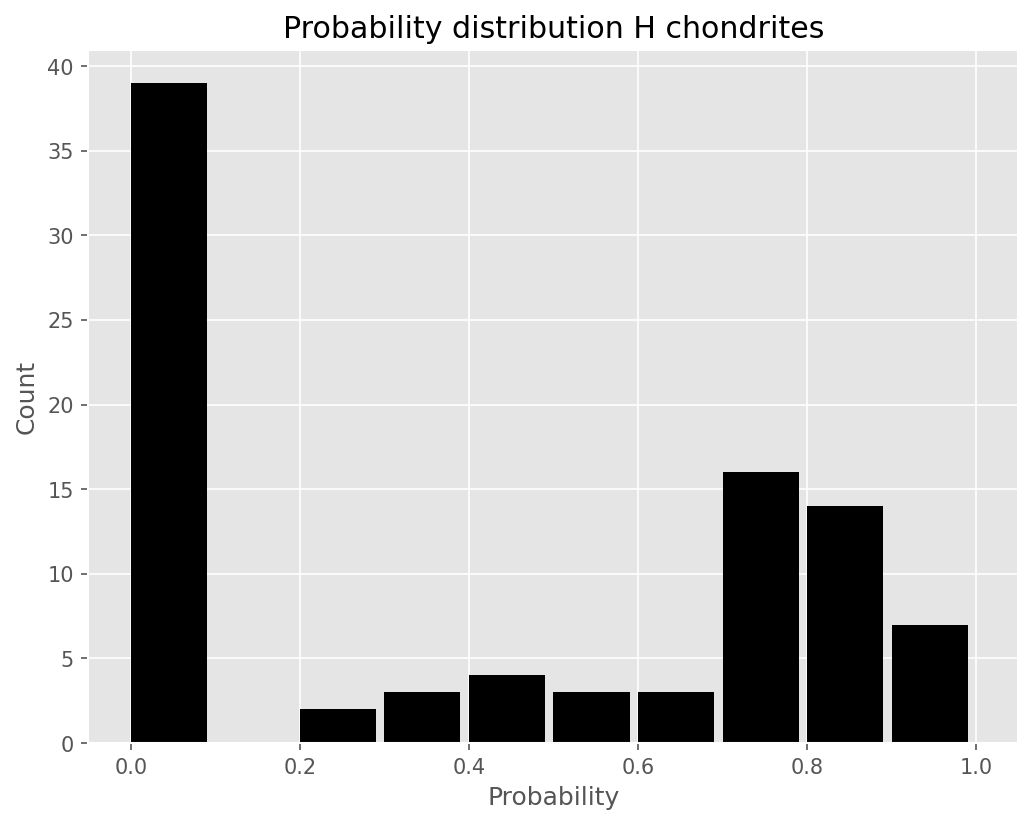

In [37]:
fig, (ax1) = plt.subplots(
    ncols=1,
    nrows=1,
    figsize=(8, 6),
    dpi=150,
)

plt.hist(above_diagonal_values_H, bins=list(np.arange(0, 1.1, 0.1)), width=0.09, color="#000000")

###
# Titles/Lables
plt.tick_params(labelsize=10)
plt.title("Probability distribution H chondrites")
ax1.set_xlabel("Probability")
ax1.set_ylabel("Count")
#
###

plt.show()


In [38]:
mean_probability_H = np.mean(above_diagonal_values_H)
print("{:.2f}".format(mean_probability_H))

print(str(len(pairing_data_H)) + ' H chondrites before pairing')
print("{:.0f}".format(len(pairing_data_H)*(1-mean_probability_H)) + ' H chondrites after pairing') #Number of meteorites after pairing

0.41
14 H chondrites before pairing
8 H chondrites after pairing


In [39]:
3+1+86+42+8+1+1

142